# Guía 5: Modelo de Ising

Generar configuraciones del equilibrio para un sistema monodimensional de $N$ espines interactuantes dispuestos regularmente y descriptos por el siguiente Hamiltoniano: $$\mathcal{H} = - B \mu \sum_{i=1}^N \sigma_i - J \sum_{\langle i, j \rangle} \sigma_i \sigma_j,$$ donde $\sigma_i$ es la dirección del espín del sitio $i$ y puede tomar los valores $\pm 1$, $\mu$ es su momento magnético, $B$ el campo magnético externo y $J$ la constante de acoplamiento espín-espín. El símbolo $\langle i, j \rangle$ indica que la suma se realiza sobre pares de espines ubicados en sitios de primeros vecinos.

## Ayuda

Considerese $B=\mu=J=1$. Seguramente va a ser necesario usar `NumPy` y `matplotlib`:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Escribir una función que inicialice los $N$ espines en alguna configuración deseada

In [2]:
def init(n):
    # return np.random.choice([1, -1], size=n)
    return np.full(n, 1)

Escribir una función que para una configuración calcule la magnetización $M = \mu \sum_{i=1}^N \sigma_i$.

In [3]:
def magnetizacion(espines):
    return np.sum(espines)

Escribir una función que calcule el hamiltoniano del sistema para una dada configuración de espínes monodimiensional.

In [4]:
def hamiltoniano(espines):
    n = len(espines)
    
    H = 0
    for i in range(n):
        H = H - espines[i] * (espines[(i - 1) % n] + espines[(i + 1) % n])
        
    H = (H / 2) - magnetizacion(espines)
    
    return H

Escribir una función que recorra la grilla y haga los pasos de Metropolis a una dada temperatura (_Ayuda: notar que el cambio de energía que provocaría un cambio en el signo del espín del sitio $i$ puede calcularse sólo con sus primeros vecinos_)

In [10]:
def metropolis(espines, temperatura):
    n = len(espines)
    
    for _ in range(n):
        r = np.random.rand()
        i = int(r * n)
        
        delta = 2 * espines[i] * (espines[(i - 1) % n] + espines[(i + 1) % n])
        
        if delta <= 0 or np.random.rand() <= np.exp(-delta / temperatura):
            espines[i] = - espines[i]
    
    return espines

Ahora ya se tiene todo lo necesario para escribir un algoritmo que realice $M$ pasos de Monte Carlo con el modelo de Ising, calcular la energía y la magnetización en función de los pasos para distintas temperaturas, dar los valores medios, visualizar los espines, etc...

In [28]:
M = 1000
temperatura = 2.6
n = 100

espines = init(n)

eng = []
mag = []
for _ in range(M):
    eng.append(hamiltoniano(espines) / n)
    mag.append(magnetizacion(espines) / n)
    espines = metropolis(espines, temperatura)

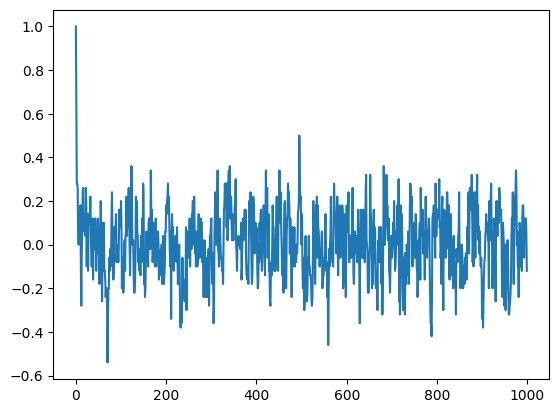

In [29]:
plt.plot(mag)
plt.show()